In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

In [2]:
TrainDF = pd.read_csv('Project MCC Train.csv') #Loading train dataset

In [3]:
TrainDF.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
TrainDF.shape

(159571, 8)

In [5]:
TestDF = pd.read_csv('Project MCC Test.csv') #Loading test dataset

In [6]:
TestDF.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [7]:
TestDF.shape

(153164, 2)

### Getting general information of the data.

In [8]:
TrainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [9]:
TestDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


#### Finding the null value percentage in each of the columns in train dataset

In [10]:
TrainDF.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [11]:
TestDF.isnull().sum()

id              0
comment_text    0
dtype: int64

There are no null values present.

#### Checking for blank spaces, random characters in each column

In [12]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in TrainDF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((TrainDF[c] == s).sum())

  in id =  0
? in id =  0
- in id =  0
 ? in id =  0
 - in id =  0
?  in id =  0
-  in id =  0
 ?  in id =  0
 -  in id =  0
NA in id =  0
N/A in id =  0
 NA in id =  0
 N/A in id =  0
  in comment_text =  0
? in comment_text =  0
- in comment_text =  0
 ? in comment_text =  0
 - in comment_text =  0
?  in comment_text =  0
-  in comment_text =  0
 ?  in comment_text =  0
 -  in comment_text =  0
NA in comment_text =  0
N/A in comment_text =  0
 NA in comment_text =  0
 N/A in comment_text =  0
  in malignant =  0
? in malignant =  0
- in malignant =  0
 ? in malignant =  0
 - in malignant =  0
?  in malignant =  0
-  in malignant =  0
 ?  in malignant =  0
 -  in malignant =  0
NA in malignant =  0
N/A in malignant =  0
 NA in malignant =  0
 N/A in malignant =  0
  in highly_malignant =  0
? in highly_malignant =  0
- in highly_malignant =  0
 ? in highly_malignant =  0
 - in highly_malignant =  0
?  in highly_malignant =  0
-  in highly_malignant =  0
 ?  in highly_malignant =  0
 -

In [13]:
search =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
for c in TestDF:
    for s in search:
        print(f"{s} in {c} = ",end= " ")
        print((TestDF[c] == s).sum())

  in id =  0
? in id =  0
- in id =  0
 ? in id =  0
 - in id =  0
?  in id =  0
-  in id =  0
 ?  in id =  0
 -  in id =  0
NA in id =  0
N/A in id =  0
 NA in id =  0
 N/A in id =  0
  in comment_text =  0
? in comment_text =  0
- in comment_text =  0
 ? in comment_text =  0
 - in comment_text =  0
?  in comment_text =  0
-  in comment_text =  0
 ?  in comment_text =  0
 -  in comment_text =  0
NA in comment_text =  0
N/A in comment_text =  0
 NA in comment_text =  0
 N/A in comment_text =  0


There are no blank spaces, random characters in the columns

### Dataset Description

#### Problem Statement:

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.
Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 


#### Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   



#### Columns:

-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 

-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 

-	Rude: It denotes comments that are very rude and offensive.

-	Threat: It contains indication of the comments that are giving any threat to someone. 	

-	Abuse: It is for comments that are abusive in nature. 

-	Loathe: It describes the comments which are hateful and loathing in nature.  

-	ID: It includes unique Ids associated with each comment text given.   

-	Comment text: This column contains the comments extracted from various social media platforms. 



#### Dropping "Id" columns from train and test datasets since they are not required

### Analyzing the columns

In [14]:
for c in TrainDF.drop(columns = ['id','comment_text'],axis=1):
        print(TrainDF[c].value_counts())

0    144277
1     15294
Name: malignant, dtype: int64
0    157976
1      1595
Name: highly_malignant, dtype: int64
0    151122
1      8449
Name: rude, dtype: int64
0    159093
1       478
Name: threat, dtype: int64
0    151694
1      7877
Name: abuse, dtype: int64
0    158166
1      1405
Name: loathe, dtype: int64


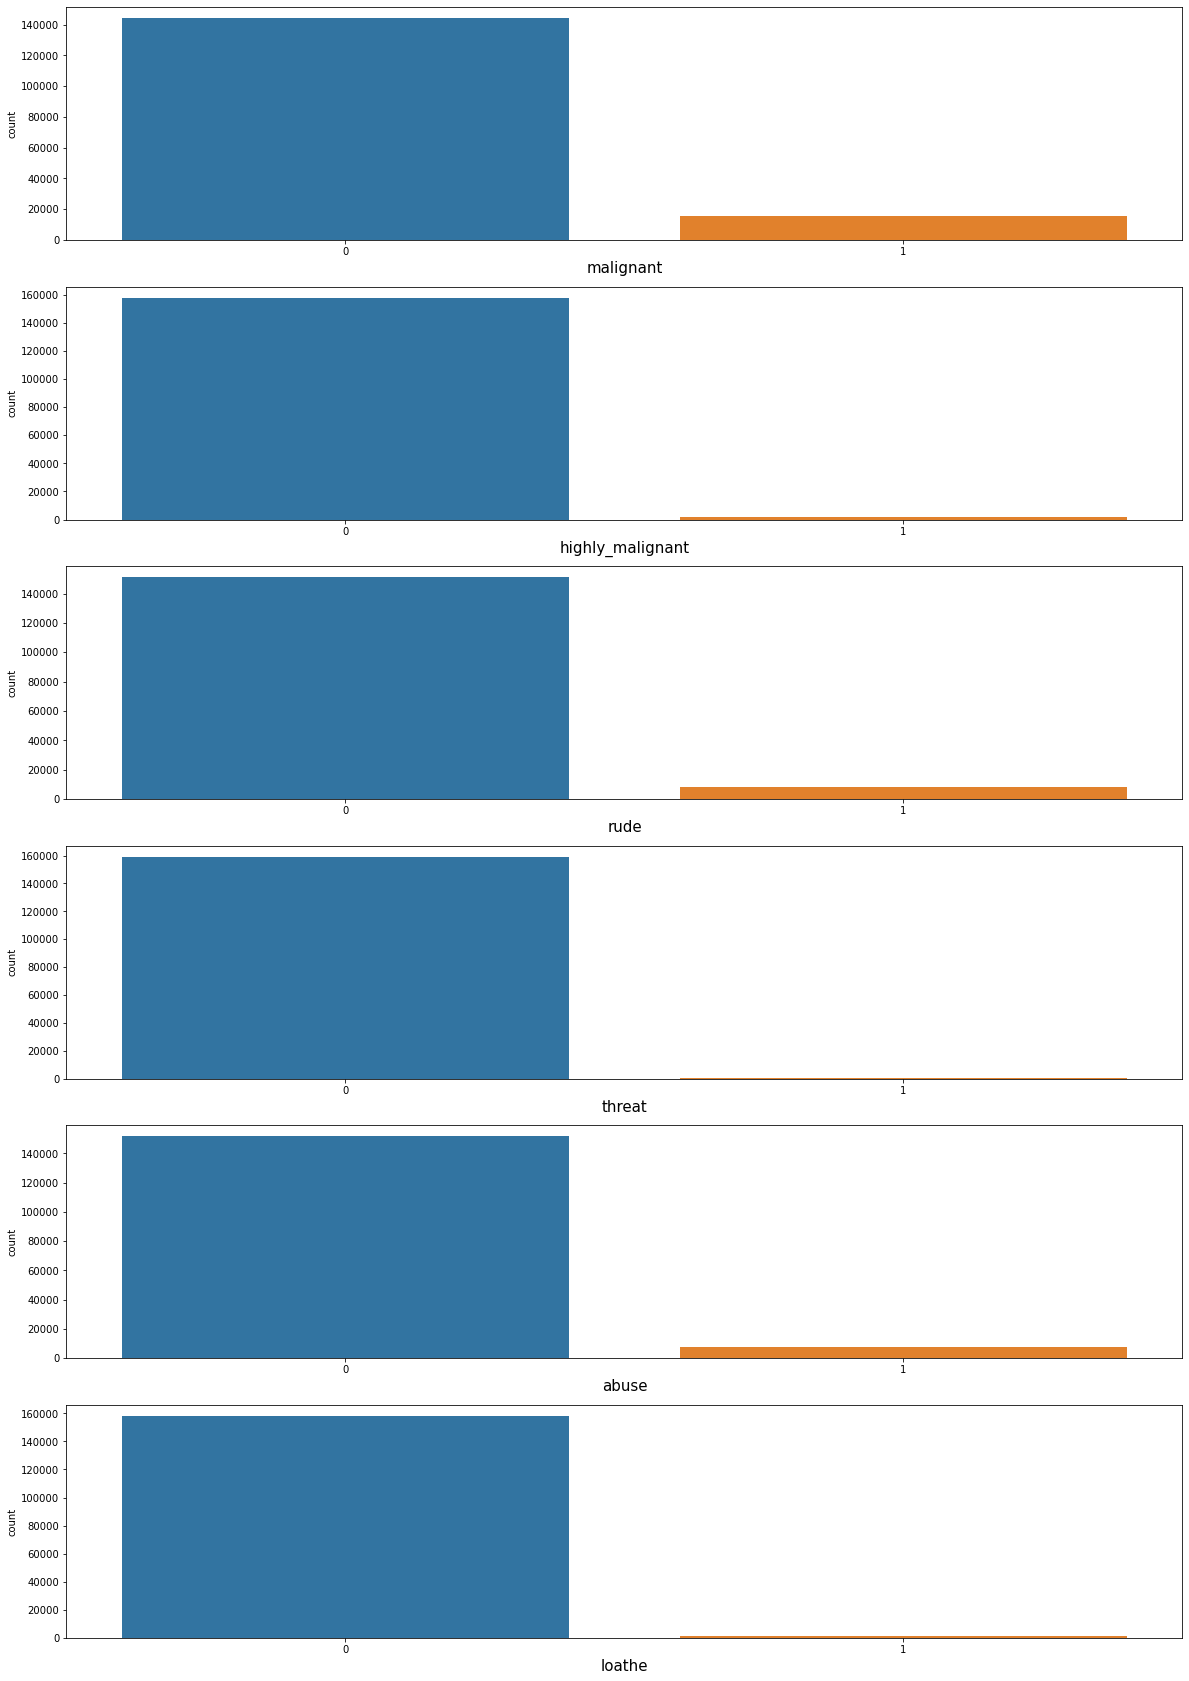

In [15]:
plt.figure(figsize=(20,30),facecolor='white')
plotnum=1
for col in TrainDF.drop(columns = ['id','comment_text'],axis=1):
    if plotnum<=6:
        plt.subplot(6,1,plotnum)
        sns.countplot(TrainDF[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

In [16]:
#Creating a length column with records of total string length of each comment text

In [17]:
TrainDF['Stringlength'] = TrainDF['comment_text'].str.len()
TrainDF.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Stringlength
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


<AxesSubplot:xlabel='Stringlength', ylabel='Density'>

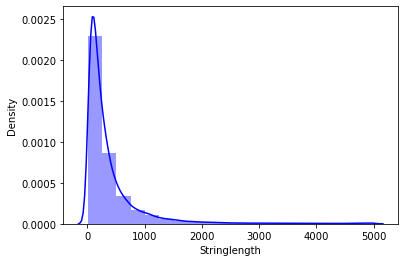

In [18]:
#Distribution of string length
sns.distplot(TrainDF.Stringlength, bins=20, color = 'blue')

### Data Pre Processing

In [19]:
import re
import string

#### Dropping column id since it is not required

In [20]:
TrainDF.drop(columns='id',inplace = True)
TestDF.drop(columns='id',inplace = True)

In [21]:
# Convert all messages to lower case
TrainDF['comment_text'] = TrainDF['comment_text'].str.lower()


TrainDF['comment_text'] = TrainDF['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress') # Replace email addresses with 'email'

# Replace URLs with 'webaddress'
TrainDF['comment_text'] = TrainDF['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')


TrainDF['comment_text'] = TrainDF['comment_text'].str.replace(r'£|\$', 'dollars')# Replace money symbols with 'moneysymb' 

# Replacing 10 digit phone numbers with 'phonenumber'
TrainDF['comment_text'] = TrainDF['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

TrainDF['comment_text'] = TrainDF['comment_text'].str.replace(r'\d+(\.\d+)?','num') # Replace numbers with 'num'


TrainDF['comment_text'] = TrainDF['comment_text'].str.replace(r'[^\w\d\s]',' ') #removing punctuations

TrainDF['comment_text'] = TrainDF['comment_text'].str.replace(r'[\_]',' ') #removing underscore characters

TrainDF['comment_text'] = TrainDF['comment_text'].str.replace(r'\s+[a-zA-Z]\s+', ' ') #removing single characters

TrainDF['comment_text'] = TrainDF['comment_text'].str.replace(r'\s+', ' ') #removing whitespace between terms with a single space

TrainDF['comment_text'] = TrainDF['comment_text'].str.replace(r'^\s+|\s+?$', ' ') #removing leading and trailing whitespace


In [22]:
TrainDF.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Stringlength
0,explanation why the edits made under my userna...,0,0,0,0,0,0,264
1,d aww he matches this background colour m seem...,0,0,0,0,0,0,112
2,hey man m really not trying to edit war it jus...,0,0,0,0,0,0,233
3,more can make any real suggestions on improve...,0,0,0,0,0,0,622
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,67


In [23]:
import nltk
from nltk.corpus import stopwords,wordnet

In [24]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [26]:
from nltk.stem import WordNetLemmatizer

In [27]:
stop_words = set(stopwords.words('english') + ['u','m', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin',"u're", 'ure'])
TrainDF['comment_text'] = TrainDF['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [28]:
lem=WordNetLemmatizer()
TrainDF['comment_text'] = TrainDF['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [29]:
TrainDF['Cleaned_Stringlength'] = TrainDF['comment_text'].str.len()
TrainDF.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Stringlength,Cleaned_Stringlength
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,164
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,112,83
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,622,364
4,sir hero chance remember page,0,0,0,0,0,0,67,29


<AxesSubplot:xlabel='Cleaned_Stringlength', ylabel='Density'>

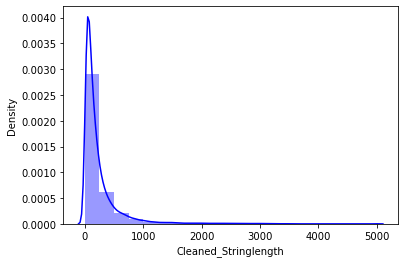

In [30]:
#Distribution of cleaned string length
sns.distplot(TrainDF.Cleaned_Stringlength, bins=20, color = 'blue')

In [31]:
m = TrainDF.iloc[:,1:7].sum()

<AxesSubplot:title={'center':'Malignant comment types and their Counts'}>

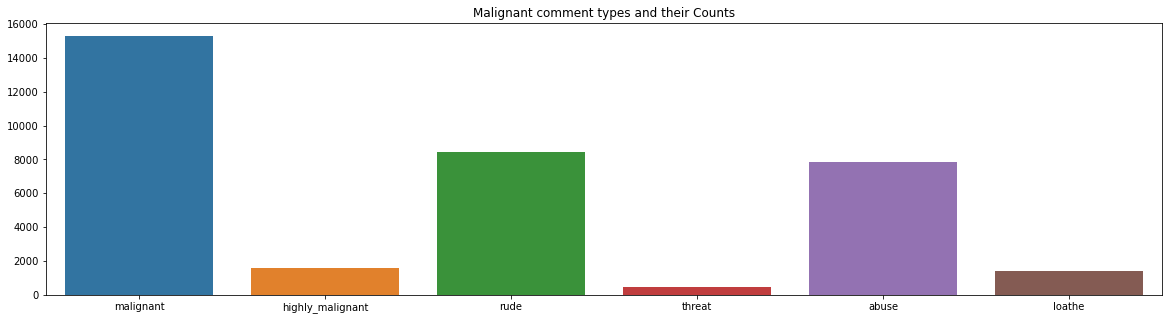

In [32]:
plt.figure(figsize=(20,5),facecolor='white')
plt.title("Malignant comment types and their Counts")
sns.barplot(m.index, m.values)

In [33]:
m

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [34]:
import wordcloud
from wordcloud import WordCloud

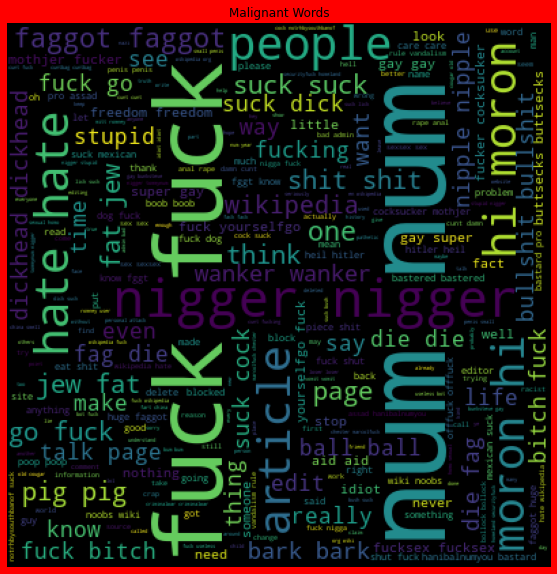

In [35]:
mal=TrainDF['comment_text'][TrainDF['malignant']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Malignant Words')
plt.show()

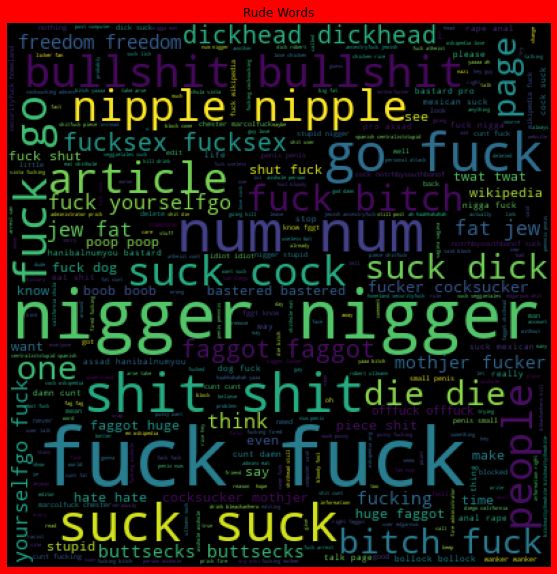

In [36]:
mal=TrainDF['comment_text'][TrainDF['rude']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Rude Words')
plt.show()

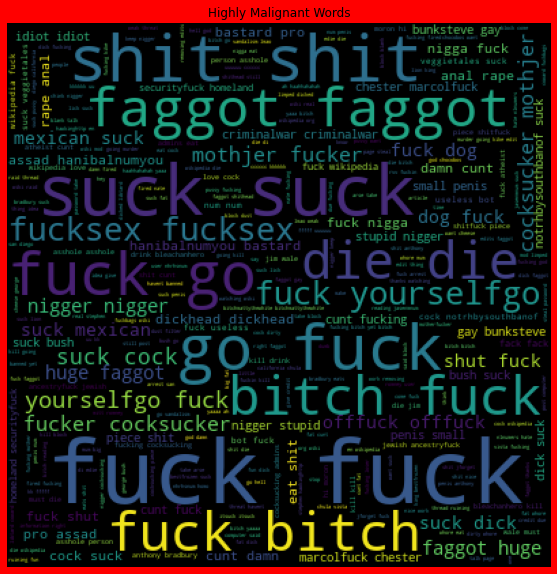

In [37]:
mal=TrainDF['comment_text'][TrainDF['highly_malignant']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Highly Malignant Words')
plt.show()

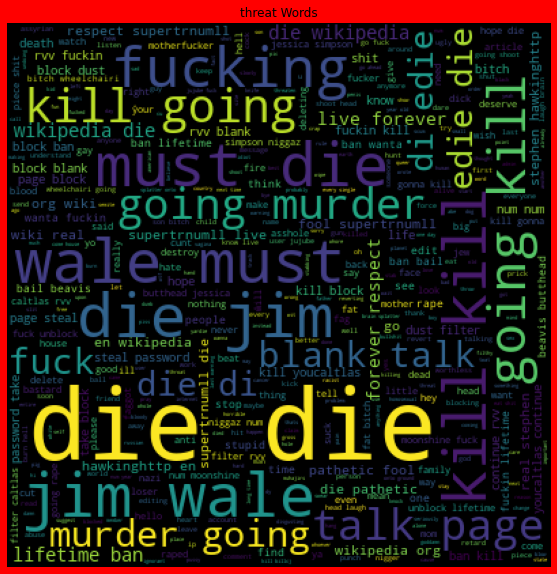

In [38]:
mal=TrainDF['comment_text'][TrainDF['threat']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='threat Words')
plt.show()

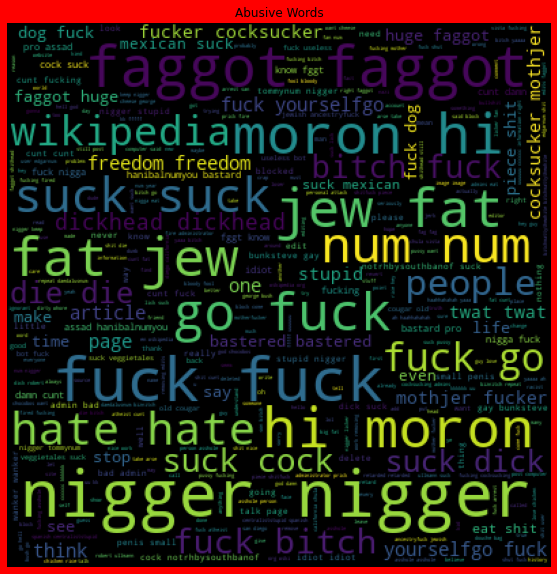

In [39]:
mal=TrainDF['comment_text'][TrainDF['abuse']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Abusive Words')
plt.show()

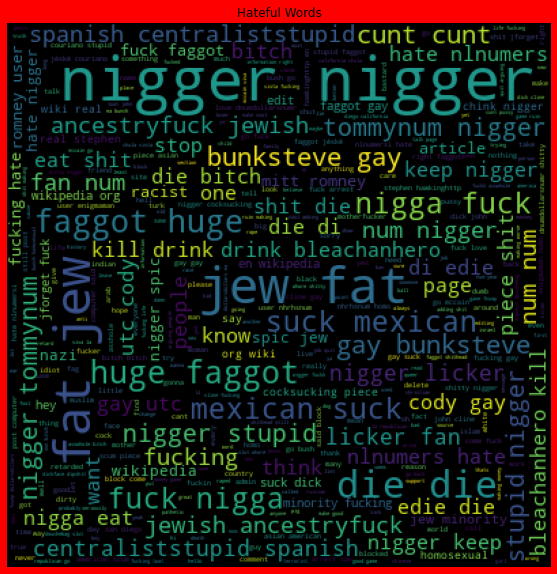

In [40]:
mal=TrainDF['comment_text'][TrainDF['loathe']==1]
wrdcld= WordCloud(width=400,height=400,background_color='black',max_words=400).generate(' '.join(mal))
plt.figure(figsize=(10,10),facecolor = 'r')
plt.imshow(wrdcld)
plt.axis('off')
plt.title(label='Hateful Words')
plt.show()

In [41]:
m_corr=TrainDF.corr()

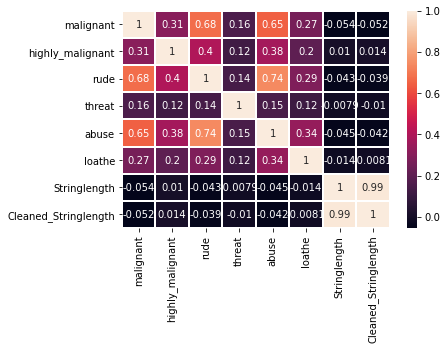

In [42]:
sns.heatmap(m_corr,annot=True,linewidth=1)
plt.show()

In [43]:
TrainDF['comment_type'] = TrainDF.iloc[:,1:7].sum(axis=1)

In [44]:
TrainDF.comment_type.value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: comment_type, dtype: int64

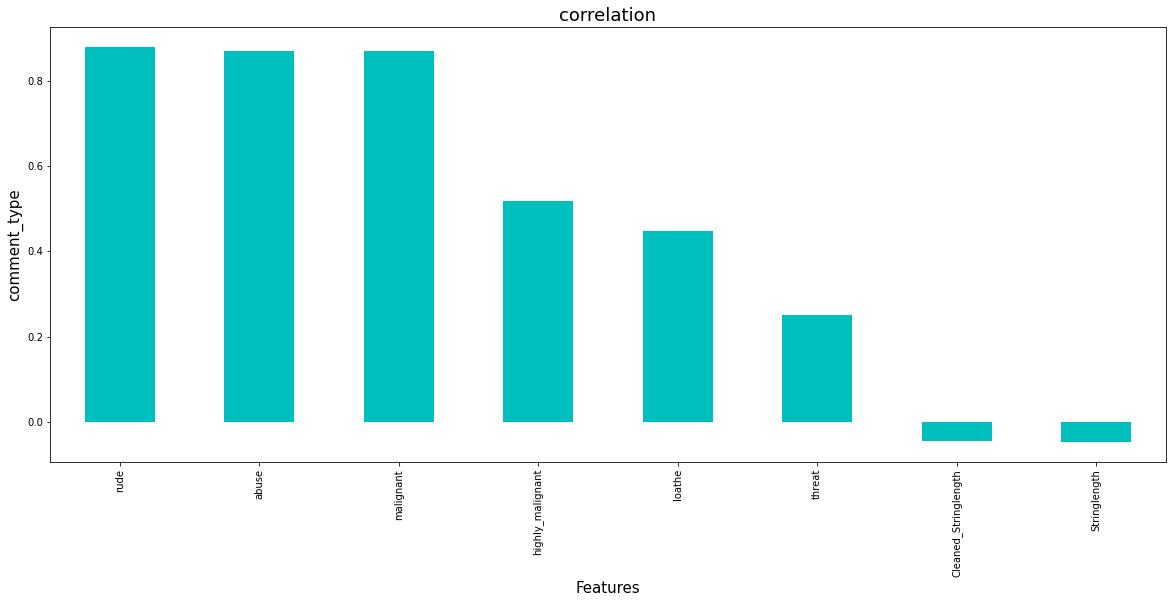

In [45]:
plt.figure(figsize = (20,8))
TrainDF.corr()['comment_type'].sort_values(ascending = False).drop(['comment_type']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('comment_type',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

Rude,Abuse, Malignant have highest positive correlation with comment_type

Dropping columns 'Cleaned_Stringlength' and 'Stringlength' since they are highly correlated to each other and do not contribute to model building

In [46]:
TrainDF.drop(columns=[ 'Cleaned_Stringlength','Stringlength' ],inplace = True)

In [47]:
TrainDF['comment_type'] = np.where((TrainDF['comment_type'] > 0), 1,0)

In [48]:
TrainDF['comment_type'].value_counts()

0    143346
1     16225
Name: comment_type, dtype: int64

<AxesSubplot:xlabel='comment_type', ylabel='count'>

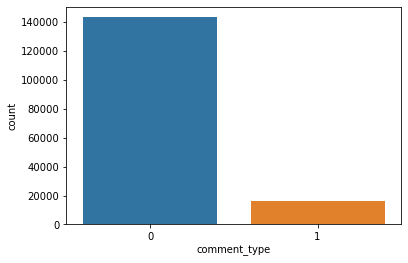

In [49]:
sns.countplot(TrainDF['comment_type'])

In [50]:
print('Benign comment ratio = ',round(len(TrainDF[TrainDF['comment_type']==0])/len(TrainDF.comment_type),2)*100,'%')

Benign comment ratio =  90.0 %


In [51]:
print('Malignant comment ratio = ',round(len(TrainDF[TrainDF['comment_type']==1])/len(TrainDF.comment_type),2)*100,'%')

Malignant comment ratio =  10.0 %


#### Classes are imbalanced

In [52]:
from collections import Counter

In [53]:
ben = Counter(",".join(TrainDF[TrainDF['comment_type']==0]["comment_text"]).split()).most_common(10)
mal = Counter(",".join(TrainDF[TrainDF['comment_type']==1]["comment_text"]).split()).most_common(10)
Countdf=pd.DataFrame()
print("TOP 10 Malignant and Benign Words with their counts")
Countdf['Malignant Words']=mal
Countdf['Benign Words']=ben
Countdf.head(10)

TOP 10 Malignant and Benign Words with their counts


,Malignant Words,Benign Words
0,"(fuck, 9015)","(num, 132007)"
1,"(num, 7785)","(article, 69227)"
2,"(suck, 4461)","(page, 51972)"
3,"(like, 3783)","(wikipedia, 42876)"
4,"(wikipedia, 3706)","(one, 27894)"
5,"(shit, 3465)","(talk, 27848)"
6,"(nigger, 3377)","(would, 27324)"
7,"(fucking, 3129)","(please, 24957)"
8,"(go, 2865)","(like, 23870)"
9,"(as, 2838)","(source, 20303)"


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
tf_vec = TfidfVectorizer(max_features=50000,smooth_idf=False, stop_words='english')

In [56]:
features = tf_vec.fit_transform(TrainDF['comment_text'])

In [57]:
X = features
y=TrainDF['comment_type']

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Balancing out classes in Label column using SMOTE technique.

In [59]:
from imblearn.over_sampling import SMOTE as sm

smt_x,smt_y = sm().fit_resample(X,y)

### This is a Classification problem since Target column ('comment_type') has Catergorical type of Data.


In [60]:
from sklearn.naive_bayes import MultinomialNB
maxAcc = 0
maxRS=0
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .30, random_state = i)
    modRF =  MultinomialNB()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9095200446470095 on random_state: 77


In [61]:
x_train,x_test,y_train,y_test = train_test_split(smt_x,smt_y,test_size = .30,random_state = 77)

In [62]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import log_loss

In [63]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [64]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import ComplementNB

In [65]:
RFC = RandomForestClassifier()
XGBC= XGBClassifier()
ADBC = AdaBoostClassifier()
LOGR= LogisticRegression(solver='liblinear')
MNB = MultinomialNB()
CNB = ComplementNB()
PC= PassiveAggressiveClassifier()

In [66]:
models=[RFC,XGBC,ADBC,LOGR,MNB,CNB,PC]

In [67]:
from sklearn.model_selection import cross_val_score as cvs

In [70]:
for m in models:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=classification_report(y_test,pred)
    conf_matrx=confusion_matrix(y_test,pred)
    loss=log_loss(y_test,pred)
    CVS=cvs(m,smt_x,smt_y,cv=5).mean()
    ROC_AUC=roc_auc_score(y_test,pred)
    print(m,"Results :")
    print("Accuracy :",acc)
    print("Cross Validation Score :",CVS)
    print('Log Loss:',loss)
    print("Confusion Matrix :",conf_matrx)
    print("ROC AUC Score :",ROC_AUC)
    print("\n")

RandomForestClassifier() Results :
Accuracy :               precision    recall  f1-score   support

           0       0.99      0.97      0.98     43284
           1       0.97      0.99      0.98     42724

    accuracy                           0.98     86008
   macro avg       0.98      0.98      0.98     86008
weighted avg       0.98      0.98      0.98     86008

Cross Validation Score : 0.9819074309114525
Log Loss: 0.7268667738422132
Confusion Matrix : [[41818  1466]
 [  344 42380]]
ROC AUC Score : 0.979039495643767


[07:49:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:51:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric

### ROC AUC curves 

In [78]:
!pip install -U scikit-plot

In [80]:
import scikitplot as sktplt

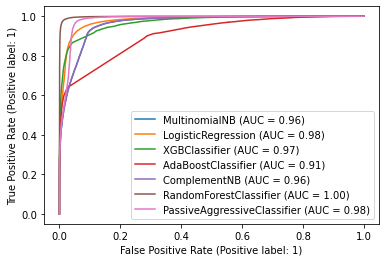

In [82]:
disp = plot_roc_curve(MNB,x_test,y_test)
mod = [LOGR,XGBC,ADBC,CNB,RFC,PC]
for i in mod:
    plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

In [84]:
lr_prob = LOGR.predict_proba(x_test)
rf_prob = RFC.predict_proba(x_test)
adbc_prob = ADBC.predict_proba(x_test)
xgbc_prob = XGBC.predict_proba(x_test)
mnb_prob = MNB.predict_proba(x_test)
cnb_prob = CNB.predict_proba(x_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

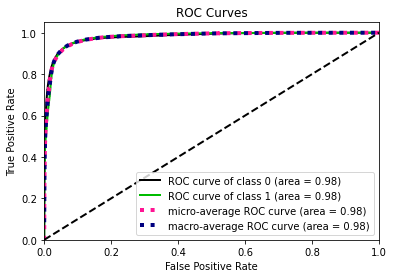

In [85]:
sktplt.metrics.plot_roc(y_test,lr_prob) #Logistic Regression ROC Curves

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

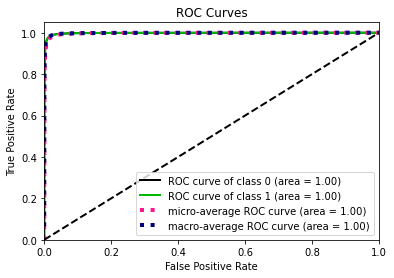

In [86]:
sktplt.metrics.plot_roc(y_test,rf_prob) # Random Forest Classifier ROC Curves


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

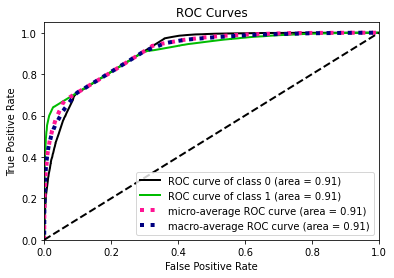

In [87]:
sktplt.metrics.plot_roc(y_test,adbc_prob) # Ada Boost Classifier ROC Curve


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

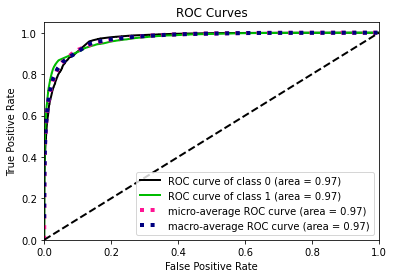

In [88]:
sktplt.metrics.plot_roc(y_test,xgbc_prob) #Xgb Classifier ROC Curve


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

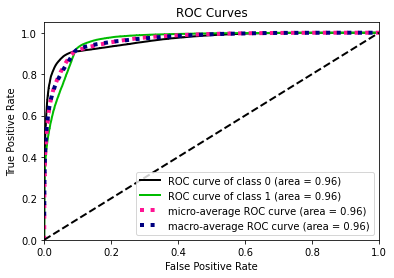

In [89]:
sktplt.metrics.plot_roc(y_test,mnb_prob) #Multinomial Naive Bayes ROC Curves


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

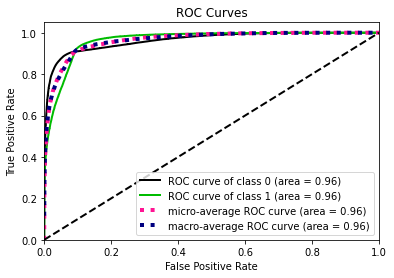

In [90]:
sktplt.metrics.plot_roc(y_test,cnb_prob) #Complement Naive Bayes ROC Curves


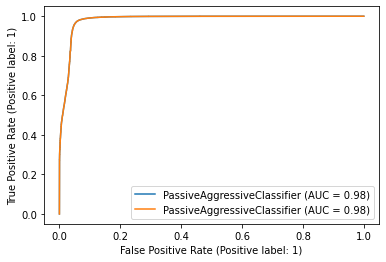

In [92]:
disp = plot_roc_curve(PC,x_test,y_test) #Passive Aggressive Classifier ROC Curves
plot_roc_curve(i,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

### Based on comparing the above graphs, roc_auc_scores,Precision, Recall, Accuracy Scores with Cross validation scores and log loss scores, it is determined that Random Forest Classifier,Passive Aggressive Classifier and Logistic Regression are the best models for the dataset.

### Hyper Parameter Tuning

In [93]:
parameter = {'n_estimators':[50,100,300],'max_depth': [10,60],'min_samples_leaf':[2,5,30],'min_samples_split':[1,2,5],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [100]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 60],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 5, 30],
                         'min_samples_split': [1, 2, 5],
                         'n_estimators': [50, 100, 300]},
             verbose=1)

In [101]:
GridCV.best_params_

{'criterion': 'gini',
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [102]:
Best_mod = RandomForestClassifier(n_estimators = 300,criterion = 'gini', max_depth= 60, max_features = 'auto',min_samples_leaf = 2, min_samples_split = 2)
Best_mod.fit(x_train,y_train)
rfpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,rfpred)
print(acc*100)
conf_matrx = confusion_matrix(y_test,rfpred)
conf_matrx

90.22300251139428


array([[37293,  5991],
       [ 2418, 40306]], dtype=int64)

In [103]:
parameter = {'penalty':['l1', 'l2'],'dual': [True,False],'C':[1,2,5,10],'fit_intercept':[True,False],'solver':['liblinear','saga','sag','newton-cg'],'max_iter':[100,200]}

In [104]:
GridCV = GridSearchCV(LogisticRegression(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [105]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 2, 5, 10], 'dual': [True, False],
                         'fit_intercept': [True, False], 'max_iter': [100, 200],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga', 'sag', 'newton-cg']},
             verbose=1)

In [106]:
GridCV.best_params_

{'C': 10,
 'dual': False,
 'fit_intercept': False,
 'max_iter': 200,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [132]:
Best_mod2 = LogisticRegression(penalty = 'l1',dual = False,fit_intercept=False,C=10,solver='liblinear',max_iter=200)
Best_mod2.fit(x_train,y_train)
LRpred = Best_mod2.predict(x_test)
acc = accuracy_score(y_test,LRpred)
print(acc*100)
conf_matrx = confusion_matrix(y_test,LRpred)
conf_matrx

95.8294577248628


array([[40554,  2730],
       [  857, 41867]], dtype=int64)

In [133]:
accu = classification_report(y_test,LRpred)
print(accu)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     43284
           1       0.94      0.98      0.96     42724

    accuracy                           0.96     86008
   macro avg       0.96      0.96      0.96     86008
weighted avg       0.96      0.96      0.96     86008



In [109]:
parameter = {'C':[1,2,5,10],'fit_intercept':[True,False],'early_stopping':[True,False],'validation_fraction':[0.001,0.1],'tol':[0.001,0.01,0.1,1.0],'n_iter_no_change':[5,10],'max_iter':[1000,1500,2000,5000]}

In [110]:
GridCV = GridSearchCV(PassiveAggressiveClassifier(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [111]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 1024 candidates, totalling 5120 fits


GridSearchCV(cv=5, estimator=PassiveAggressiveClassifier(), n_jobs=-1,
             param_grid={'C': [1, 2, 5, 10], 'early_stopping': [True, False],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 1500, 2000, 5000],
                         'n_iter_no_change': [5, 10],
                         'tol': [0.001, 0.01, 0.1, 1.0],
                         'validation_fraction': [0.001, 0.1]},
             verbose=1)

In [112]:
GridCV.best_params_

{'C': 1,
 'early_stopping': False,
 'fit_intercept': False,
 'max_iter': 2000,
 'n_iter_no_change': 10,
 'tol': 0.01,
 'validation_fraction': 0.1}

In [114]:
Best_mod3 = PassiveAggressiveClassifier(C=1,early_stopping=False,fit_intercept=False,max_iter=2000,n_iter_no_change=10,tol=0.01,validation_fraction=0.01)
Best_mod3.fit(x_train,y_train)
pcpred = Best_mod3.predict(x_test)
acc = accuracy_score(y_test,pcpred)
print(acc*100)
conf_matrx = confusion_matrix(y_test,pcpred)
conf_matrx

95.20393451771928


array([[39871,  3413],
       [  712, 42012]], dtype=int64)

#### After Tuning the hyper parameters it is found that Logistic Regression model performs the best.

### Saving The Model

In [134]:
import joblib
joblib.dump(Best_mod2,"BestModelMalignantClassifier.pkl")

['BestModelMalignantClassifier.pkl']

### Preparing Test Dataset

In [131]:
TestDF.head()

,comment_text
0,yo bitch ja rule succesful ever whats hating s...
1,rfc title fine imo
2,source zawe ashton lapland
3,look back source information updated correct f...
4,anonymously edit article


In [117]:
# Convert all messages to lower case
TestDF['comment_text'] = TestDF['comment_text'].str.lower()


TestDF['comment_text'] = TestDF['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress') # Replace email addresses with 'email'

# Replace URLs with 'webaddress'
TestDF['comment_text'] = TestDF['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')


TestDF['comment_text'] = TestDF['comment_text'].str.replace(r'£|\$', 'dollars')# Replace money symbols with 'moneysymb' 

# Replacing 10 digit phone numbers with 'phonenumber'
TestDF['comment_text'] = TestDF['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

TestDF['comment_text'] = TestDF['comment_text'].str.replace(r'\d+(\.\d+)?','num') # Replace numbers with 'num'


TestDF['comment_text'] = TestDF['comment_text'].str.replace(r'[^\w\d\s]',' ') #removing punctuations

TestDF['comment_text'] = TestDF['comment_text'].str.replace(r'[\_]',' ') #removing underscore characters

TestDF['comment_text'] = TestDF['comment_text'].str.replace(r'\s+[a-zA-Z]\s+', ' ') #removing single characters

TestDF['comment_text'] = TestDF['comment_text'].str.replace(r'\s+', ' ') #removing whitespace between terms with a single space

TestDF['comment_text'] = TestDF['comment_text'].str.replace(r'^\s+|\s+?$', ' ') #removing leading and trailing whitespace


In [137]:
stop_words = set(stopwords.words('english') + ['u','m', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin',"u're", 'ure'])
TestDF['comment_text'] = TestDF['comment_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [138]:
lem=WordNetLemmatizer()
TestDF['comment_text'] = TestDF['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

In [139]:
tf_vec = TfidfVectorizer(max_features=50000,smooth_idf=False, stop_words='english')

In [140]:
features = tf_vec.fit_transform(TestDF['comment_text'])

In [141]:
test = features

#### Loading The Model

In [135]:
mod=joblib.load("BestModelMalignantClassifier.pkl")

In [142]:
mod.predict(test)

array([1, 0, 0, ..., 0, 0, 0])

#### Comment Classification 1 means Malignant and 0 means Benign

In [143]:
Prediction_accuracy = pd.DataFrame({'Classification': mod.predict(test), 'Comments': TestDF['comment_text']})
Prediction_accuracy.head()

,Classification,Comments
0,1,yo bitch ja rule succesful ever whats hating s...
1,0,rfc title fine imo
2,0,source zawe ashton lapland
3,0,look back source information updated correct f...
4,0,anonymously edit article


In [144]:
Prediction_accuracy

,Classification,Comments
0,1,yo bitch ja rule succesful ever whats hating s...
1,0,rfc title fine imo
2,0,source zawe ashton lapland
3,0,look back source information updated correct f...
4,0,anonymously edit article
...,...,...
153159,1,totally agree stuff nothing long crap
153160,1,throw field home plate get faster throwing cut...
153161,0,okinotorishima category see change agree corre...
153162,0,one founding nation eu germany law return quit...


In [145]:
Prediction_accuracy.to_csv("MCC-Test.csv")